In [455]:
import numpy as np
from numpy.linalg import inv
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [233]:
matrixDim=5
padeM=2
padeN=padeM-1
order=padeM+padeN-1

sparsity = 0.001
Amat = np.zeros((matrixDim,matrixDim))
for i in range(0,matrixDim):
    Amat[i,i] = i + 1
Amat = Amat + sparsity*np.random.randint(20,size=(matrixDim,matrixDim)) 

p=np.eye(matrixDim,1)
q=np.zeros((matrixDim,matrixDim-1))
print(np.shape(p),np.shape(q))
diagMat=np.diag(Amat)
print(diagMat)
lowestElements=np.argsort(diagMat)
print(lowestElements)

p[lowestElements[0]]=1.0
print('p',p)
print(lowestElements[1:])
for i in range(len(lowestElements)):
    if i==0:
        continue
    q[lowestElements[i],i-1]=1.0
    print('Q test:',np.outer(q[:,i-1],q[:,i-1]))
    
print('qis:',q)
    
    
    

#print('product',np.outer(p,p))
projP=np.outer(p,p)
print(q)
projQ=np.outer(q[:,0],q[:,0])
#print('product',np.outer(q[:,0],q[:,0]))
H0=np.diag(np.diag(Amat))#np.matmul(np.matmul(projP,Amat),projP)
V=Amat-H0
guessEps=diagMat[0]+0.1
eps=guessEps
print('init Guess:',eps)

padeCoeffNum=np.zeros(padeM)
padeCoeffDenom=np.zeros(padeN)
inputCoeff=np.zeros(padeM+padeN)

w,v=LA.eig(Amat)
print('real eigs:',w)

outerV=np.outer(v[:,0],v[:,0])
print('outer:',outerV)
print('v.T Amat V:',np.matmul(np.matmul(v[:,0].T,Amat),v[:,0]))
print('projV Amat projV:',np.matmul(np.matmul(outerV,Amat),outerV))
print('diag:',np.diag(np.matmul(np.matmul(outerV,Amat),outerV)))
print('diag sum:',np.sum(np.diag(np.matmul(np.matmul(outerV,Amat),outerV))))

(5, 1) (5, 4)
[1.    2.008 3.012 4.003 5.002]
[0 1 2 3 4]
p [[1.]
 [0.]
 [0.]
 [0.]
 [0.]]
[1 2 3 4]
Q test: [[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Q test: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Q test: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
Q test: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
qis: [[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
init Guess: 1.1
real eigs: [0.99958602 2.00800028 5.00229117 3.01216109 4.00296143]
outer: [[ 9.99571417e-01 -1.76570327e-02 -9.29661440e-03 -3.25673264e-03
  -4.42661241e-03]
 [-1.76570327e-02  3.11904481e-04  1.64221007e-04  5.75288907e-05
   7.81943528e-05]
 [-9.29661440e-03  1.64221007e-04  8.64640962e-05  3.02895691e-05
   4.11701534e-05]


In [61]:
# Returns the resolvent operator defined as:
# T0 ==  sum_i |q_i> [Eps - |q_i><q_i|H0|q_i><q_i|]^-1 <q_i| = sum_i  Q_i/(Eps - Q_iH0Q_i)
def createT0_projQ(q,qDim,H0Dim,eps,H0): #qDim>0
    print(q,eps,qDim)
    epsMat=np.zeros((H0Dim,H0Dim))
    denom=np.zeros((H0Dim,H0Dim))
    np.fill_diagonal(epsMat,eps)
    
    sumMatrix=np.zeros((H0Dim,H0Dim))
    for i in range(qDim):
        Q=np.outer(q[:,i],q[:,i])
        print('Q outer:',Q)
        QH0Q=np.matmul(np.matmul(Q,H0),Q)
        denom=epsMat-QH0Q
        denom=inv(denom)
        sumMatrix=sumMatrix+np.matmul(np.matmul(q[:,i],denom),q[:,i].T)
    
    return sumMatrix

# defines the correction vector, phi, according to order i
# phi = (T0V)^(i+1) |p>
def extendPSpace(T0,V,p,order):
    T0V=np.matmul(T0,V)
    tmp=T0V
    
    for i in range(1,order+1):
        print('extending for order: ',order+1)
        tmp=np.matmul(tmp,T0V)
        
    correctionVec=np.matmul(tmp,p)
    print('Correction vector:',correctionVec)
    return correctionVec
    

    

In [62]:
### Code that works for random matrix; now generalize to ACES CIS matrix
totalVecs=np.zeros((matrixDim,matrixDim+10))
totalVecs[:,[0]]=p
phi=np.zeros((matrixDim,1))

order=5
for i in range(1,order):
    phi=0.0
    T0=createT0_projQ(q,matrixDim-1,matrixDim,eps,H0)
    phi=extendPSpace(T0,V,p,order)
    totalVecs[:,[i]]=phi
    qvecs, qroots = np.linalg.qr(totalVecs[:,:i+1])
    print('orthogonalized guess vecs:',qvecs)
    RHR=np.matmul(np.matmul(qvecs.T,Amat),qvecs)
    guessRoots,guessVecs=LA.eig(RHR)
    print('guess Roots: ',guessRoots)
    indx=guessRoots.argsort()
    theta=guessRoots[indx]
    eps=theta[0]
    

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 1.104 4
Q outer: [[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Q outer: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Q outer: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
Q outer: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
extending for order:  6
extending for order:  6
extending for order:  6
extending for order:  6
extending for order:  6
Correction vector: [[0.00139854]
 [0.00139854]
 [0.00139854]
 [0.00139854]
 [0.00139854]]
orthogonalized guess vecs: [[ 1.   0. ]
 [ 0.  -0.5]
 [ 0.  -0.5]
 [ 0.  -0.5]
 [ 0.  -0.5]]
guess Roots:  [1.00390594 3.54759406]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 1.0039059401797719 4
Q outer: [[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0

In [63]:
cisHeH=np.loadtxt('cisHeH.txt')
print(cisHeH)
finalCisHeH=np.zeros((11,11)) #dimension of HeH+ CIS matrix; defines i and j index as well

counter=0
for i in range(11):
    for j in range(i,11):
        print('i,j:',i,j)
        finalCisHeH[i,j]=cisHeH[counter]
        finalCisHeH[j,i]=finalCisHeH[i,j]
        counter=counter+1
        
print('finalCISheH',finalCisHeH)
guessRoots,guessVecs=LA.eig(finalCisHeH)
print('HeH+ CIS roots:',guessRoots)

[ 8.28692379e-01  5.54853946e-02  9.41294716e-03  0.00000000e+00
  0.00000000e+00  1.00346189e-02  0.00000000e+00  0.00000000e+00
  1.02642480e-02  4.58917500e-03  4.92319800e-02  1.20240609e+00
 -4.05652551e-02  0.00000000e+00  0.00000000e+00 -3.36256815e-02
  0.00000000e+00  0.00000000e+00 -4.23616784e-02 -2.23130733e-02
  9.31659731e-04  1.63686245e+00  0.00000000e+00  0.00000000e+00
 -2.91054360e-03  0.00000000e+00  0.00000000e+00  7.95477687e-03
  1.80429220e-02  2.29463146e-03  1.78808803e+00  0.00000000e+00
  0.00000000e+00 -2.38849123e-03  3.78608309e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.78808803e+00  0.00000000e+00
 -3.78608309e-02 -2.38849123e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.12464069e+00  0.00000000e+00  0.00000000e+00
  3.86410672e-02  4.88817502e-02  8.70826803e-03  2.36104099e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.36104099e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.01429477e+00 -2.22908

In [162]:
Amat=finalCisHeH
matrixDim=11

p=np.eye(matrixDim,1)
q=np.zeros((matrixDim,matrixDim-1))
print(np.shape(p),np.shape(q))
diagMat=np.diag(Amat)
print(diagMat)
lowestElements=np.argsort(diagMat)
print(lowestElements)

p[lowestElements[0]]=1.0
print('p',p)
print(lowestElements[1:])
for i in range(len(lowestElements)):
    if i==0:
        continue
    q[lowestElements[i],i-1]=1.0
    print('Q test:',np.outer(q[:,i-1],q[:,i-1]))
    
print('qis:',q)

H0=np.diag(np.diag(Amat))#np.matmul(np.matmul(projP,Amat),projP)
V=Amat-H0
print('original Guess:',diagMat[0])
guessEps=diagMat[0]+0.1
eps=guessEps
print('init Guess:',eps)

(11, 1) (11, 10)
[0.82869238 1.20240609 1.63686245 1.78808803 1.78808803 2.12464069
 2.36104099 2.36104099 3.01429477 3.21425966 6.83213172]
[ 0  1  2  3  4  5  6  7  8  9 10]
p [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[ 1  2  3  4  5  6  7  8  9 10]
Q test: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Q test: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.

# FINAL SINGLE VECTOR VARIATIONAL CODE, WORKS ON HeH+ and WATER

In [225]:
# Returns the resolvent operator defined as:
# T0 ==  sum_i |q_i> [Eps - |q_i><q_i|H0|q_i><q_i|]^-1 <q_i| = sum_i  Q_i/(Eps - Q_iH0Q_i)
def createT0_projQ(q,qDim,H0Dim,eps,H0): #qDim>0
    #print(q,eps,qDim)
    epsMat=np.zeros((H0Dim,H0Dim))
    denom=np.zeros((H0Dim,H0Dim))
    np.fill_diagonal(epsMat,eps)
    
    sumMatrix=np.zeros((H0Dim,H0Dim))
    for i in range(qDim):
        Q=np.outer(q[:,i],q[:,i])
        #print('Q outer:',Q)
        QH0Q=np.matmul(np.matmul(Q,H0),Q)
        denom=epsMat-QH0Q
        for x in range(H0Dim):
            if (abs(denom[x,x]) < 0.0001):
                if (denom[x,x]< 0.00000000000000001):
                    factor=-1.0
                    denom[x,x]=factor*0.0001
                else:
                    factor=1.0
                    denom[x,x]=factor*0.0001
            denom[x,x]=1.0/denom[x,x]
                
        #denom=inv(denom)
        sumMatrix=sumMatrix+np.matmul(np.matmul(q[:,i],denom),q[:,i].T)
    
    return sumMatrix

# defines the correction vector, phi, according to order i
# phi = (T0V)^(i+1) |p>
def extendPSpace(T0,V,p,order):
    T0V=np.matmul(T0,V)
    tmp=T0V
    
    for i in range(1,order+1):
        #print('extending guess for order: ',order)
        tmp=np.matmul(tmp,T0V)
        
    correctionVec=np.matmul(tmp,p)
    #print('Correction vector:',correctionVec)
    return correctionVec

def defineAllVariables(Amat,matrixDim): #defines single vector p,q,eps,H0,V from a given matrix and its dimension
    p=np.zeros((matrixDim,1))
    q=np.zeros((matrixDim,matrixDim-1))
    print(np.shape(p),np.shape(q))
    diagMat=np.diag(Amat)
    print(diagMat)
    lowestElements=np.argsort(diagMat)
    print('lowest element index:',lowestElements)
    print('actual lowest element of Hbar:',diagMat[lowestElements[0]])

    p[lowestElements[0],0]=1.0
    print('p',p)
    counter=0
    for i in range(len(lowestElements)):
        if i==lowestElements[0]:
            continue
        else:
            q[lowestElements[i],counter]=1.0
            counter=counter+1
            
#        if i==0: 
#            continue
#        q[lowestElements[i],i-1]=1.0

        
        
    H0=np.diag(np.diag(Amat))#np.matmul(np.matmul(projP,Amat),projP)
    V=Amat-H0
    #print('original Guess:',diagMat[0])
    guessEps=diagMat[lowestElements[0]] #+0.01
    eps=guessEps
    print('init Guess:',eps)
    
    return p,q,H0,V,eps


def singleVecVariationalAlgo(matrixDim,p,q,H0,eps,V,maxOrder,fullH):
    totalVecs=np.zeros((matrixDim,matrixDim))
    totalVecs[:,[0]]=p
    phi=np.zeros((matrixDim,1))
    Amat=fullH
    #order=11
    order=maxOrder
    for i in range(1,order):
        print('order: ',i)
        phi=0.0
        T0=createT0_projQ(q,matrixDim-1,matrixDim,eps,H0)
        phi=extendPSpace(T0,V,p,i)#order)
        #print('Correction vector:',phi)
        totalVecs[:,[i]]=phi
        #print('shape of totalVecs:',np.shape(totalVecs[:,:i+1]))
        qvecs, qroots = np.linalg.qr(totalVecs[:,:i+1])
        #print('orthogonalized guess vecs:',qvecs)
        #print('shape of orthogoanlized guess vecs:',np.shape(qvecs))
        #print('shape of Amat:',np.shape(Amat))
        RHR=np.matmul(np.matmul(qvecs.T,Amat),qvecs)
        guessRoots,guessVecs=LA.eig(RHR)
        #print('guess Roots: ',guessRoots)
        indx=guessRoots.argsort()
        theta=guessRoots[indx]
        RHRvecs=guessVecs[:,indx]
        
        singleVec=np.matmul(totalVecs[:,:i+1],RHRvecs[:,0])
        print('single vec shape:',np.shape(singleVec))
        #normVec=LA.norm(singleVec)
        print('p:',p)
        pNew=np.reshape(p,(matrixDim,))
        singleVec=pNew+singleVec #(1.0/normVec)*singleVec
        print('single vec shape:',np.shape(singleVec))
        normVec=LA.norm(singleVec)
        print('norm',normVec)
        singleVec=(1.0/normVec)*singleVec
        print('single vec shape:',np.shape(singleVec))
        print('single Vec estimation: ', np.matmul(np.matmul(singleVec.T,Amat),singleVec))
        tmpVec=totalVecs[:,:i+1].sum(axis=1)
        print('tmp Vec estimation: ', np.matmul(np.matmul(tmpVec.T,Amat),tmpVec)/LA.norm(tmpVec))
        eps=theta[0]
        print('guess for iteration ',i,' is: ',np.sort(theta)[0])

In [226]:
# Water CIS
water=np.loadtxt('waterCIS.txt')
print(water)
finalwater=np.zeros((100,100)) #dimension of HeH+ CIS matrix; defines i and j index as well

counter=0
for i in range(100):
    for j in range(100):
        #print('i,j:',i,j)
        finalwater[i,j]=water[counter]
        counter=counter+1
        
print('water',finalwater)
guessRoots,guessVecs=LA.eig(finalwater)
print('water CIS roots:',np.sort(guessRoots))

[ 2.03589324e+01  0.00000000e+00  1.26535320e-01 ... -3.97087662e-03
  0.00000000e+00  4.29091660e+01]
water [[ 2.03589324e+01  0.00000000e+00  1.26535320e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.04157538e+01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.26535320e-01  0.00000000e+00  2.06988393e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.74422163e+00
   0.00000000e+00 -3.97087662e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   3.93693088e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.97087662e-03
   0.00000000e+00  4.29091660e+01]]
water CIS roots: [ 0.37098005  0.43294249  0.46643802  0.53947209  0.5917756   0.70385187
  0.86811614  0.91322348  0.95268039  0.95798485  1.04455771  1.10665125
  1.11080485  1.11102898  1.15256459  1.18658206  1.219577    1.23959655
  1.28745578  1.291

In [227]:
# water CIS test, single vector algo
p,q,H0,V,eps=defineAllVariables(finalwater,100)
print('p',p)
print('shapes',np.shape(p),np.shape(q),np.shape(H0),np.shape(V),np.shape(finalwater))
singleVecVariationalAlgo(100,p,q,H0,eps,V,100,finalwater)

(100, 1) (100, 99)
[20.35893244 20.41575378 20.69883934 20.66956258 20.90821183 21.12407872
 21.0628278  21.37183491 21.47385069 21.65058758 21.58771817 21.96159791
 22.26137875 22.29370527 22.97725823 23.03582055 23.17112117 23.46651558
 23.69552146 61.57365749  1.2634843   1.30880792  1.74096833  1.73368474
  1.82002973  1.98587599  2.02527345  2.28943815  2.3115082   2.49825721
  2.59670104  2.76244864  3.25953063  3.2670128   4.06320973  4.12038458
  4.25352619  4.54914025  4.80110362 43.82763304  0.6035821   0.75904956
  1.11055647  1.10883419  1.25982685  1.41606301  1.49451106  1.65366241
  1.73088402  1.87758931  1.94549172  2.15962324  2.63956436  2.69187266
  3.43219452  3.55661831  3.64218778  3.97547021  4.24215455 43.25011092
  0.48584799  0.56247718  1.10523601  0.95406594  1.05834158  1.24142559
  1.29567658  1.55593993  1.57214037  1.79022068  1.83447211  2.04036727
  2.51854735  2.54798704  3.35789925  3.33831579  3.56593271  3.78925498
  4.0781526  43.03767159  0.3872

single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
single vec shape: (100,)
norm 4.704194002535022e+38
single vec shape: (100,)
single Vec estimation:  8.238640281403063
tmp Vec estimation:  1.1846730196177686e+43
guess for iteration  8  is:  0.3871567903683193
order:  9
single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

tmp Vec estimation:  6.902563131567327e+111
guess for iteration  23  is:  0.3871019179921942
order:  24
single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
single vec shape: (100,)
norm 8.140337915727112e+111
single vec shape: (100,)
single Vec estimation:  8.238640281403057
tmp Vec estimation:  4.956913416718956e+116
guess for iteration  24  is:  0.3871018899805205
order:  25
single vec shape: (100,)
p: [[0.]
 [0.]
 [0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: overflow encountered in matmul
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in double_scalars


single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
single vec shape: (100,)
norm inf
single vec shape: (100,)
single Vec estimation:  0.0
tmp Vec estimation:  nan
guess for iteration  37  is:  0.387062455456995
order:  38
single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

single Vec estimation:  0.0
tmp Vec estimation:  nan
guess for iteration  51  is:  0.38692407425960246
order:  52
single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
single vec shape: (100,)
norm inf
single vec shape: (100,)
single Vec estimation:  0.0
tmp Vec estimation:  nan
guess for iteration  52  is:  0.38691490857291366
order:  53
single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
single vec shape: (100,)
norm inf
single vec shape: (100,)
single Vec estimation:  0.0
tmp Vec estimation:  nan
guess for iteration  65  is:  0.38672113891113274
order:  66
single vec shape: (100,)
p: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in matmul
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in matmul


LinAlgError: Array must not contain infs or NaNs

In [195]:
# Water DIMER CIS
water=np.loadtxt('waterDimerCIS.txt')
print(water)
finalwater=np.zeros((400,400)) #dimension of HeH+ CIS matrix; defines i and j index as well

counter=0
for i in range(400):
    for j in range(400):
        #print('i,j:',i,j)
        finalwater[i,j]=water[counter]
        counter=counter+1
        
print('water',finalwater)
guessRoots,guessVecs=LA.eig(finalwater)
print('water CIS roots:',np.sort(guessRoots))

[ 2.03858698e+01 -6.63775542e-02  9.76401134e-06 ...  9.10180564e-05
  2.87149342e-01  4.31080244e+01]
water [[ 2.03858698e+01 -6.63775542e-02  9.76401134e-06 ... -6.84039285e-08
  -5.72244688e-07 -2.45261532e-07]
 [-6.63775542e-02  2.06779774e+01 -4.79667950e-04 ... -2.68429097e-09
   1.13027623e-07  4.79820299e-08]
 [ 9.76401134e-06 -4.79667950e-04  2.04264826e+01 ... -5.67865932e-07
   1.04906298e-04  4.36448033e-05]
 ...
 [-6.84039285e-08 -2.68429097e-09 -5.67865932e-07 ...  3.94809781e+00
   4.82079274e-04  9.10180564e-05]
 [-5.72244688e-07  1.13027623e-07  1.04906298e-04 ...  4.82079274e-04
   4.35236037e+01  2.87149342e-01]
 [-2.45261532e-07  4.79820299e-08  4.36448033e-05 ...  9.10180564e-05
   2.87149342e-01  4.31080244e+01]]
water CIS roots: [ 0.38009787  0.38330207  0.44547256  0.46771961  0.47004531  0.4791968
  0.55140005  0.56589452  0.56931695  0.58332701  0.60121499  0.62180315
  0.62875922  0.6534024   0.68489906  0.69741963  0.6975091   0.72655379
  0.73034158  0.7828

In [151]:
# water CIS test, single vector algo
Amat=finalwater
p,q,H0,V,eps=defineAllVariables(finalwater,400)
print('p',p)
print('initial guess:',np.matmul(np.matmul(p.T,Amat),p))
print('shapes',np.shape(p),np.shape(q),np.shape(H0),np.shape(V),np.shape(finalwater))
singleVecVariationalAlgo(400,p,q,H0,eps,V,400,finalwater)

(400, 1) (400, 399)
[20.35893244 20.41575378 20.69883934 20.66956258 20.90821183 21.12407872
 21.0628278  21.37183491 21.47385069 21.65058758 21.58771817 21.96159791
 22.26137875 22.29370527 22.97725823 23.03582055 23.17112117 23.46651558
 23.69552146 61.57365749  1.2634843   1.30880792  1.74096833  1.73368474
  1.82002973  1.98587599  2.02527345  2.28943815  2.3115082   2.49825721
  2.59670104  2.76244864  3.25953063  3.2670128   4.06320973  4.12038458
  4.25352619  4.54914025  4.80110362 43.82763304  0.6035821   0.75904956
  1.11055647  1.10883419  1.25982685  1.41606301  1.49451106  1.65366241
  1.73088402  1.87758931  1.94549172  2.15962324  2.63956436  2.69187266
  3.43219452  3.55661831  3.64218778  3.97547021  4.24215455 43.25011092
  0.48584799  0.56247718  1.10523601  0.95406594  1.05834158  1.24142559
  1.29567658  1.55593993  1.57214037  1.79022068  1.83447211  2.04036727
  2.51854735  2.54798704  3.35789925  3.33831579  3.56593271  3.78925498
  4.0781526  43.03767159  0.387

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 400)

# variational partitioning via rotating H0

In [451]:
def createModelMatrix(matrixDim,sparsity):
    #matrixDim=10
    #sparsity = 0.01
    Amat = np.zeros((matrixDim,matrixDim))
    for i in range(0,matrixDim):
        Amat[i,i] = i + 1
    Amat = Amat + sparsity*np.random.randint(20,size=(matrixDim,matrixDim)) 
    print("Amat: \n",Amat)
    u,v=LA.eig(Amat)
    print('Correct roots: ',np.sort(u))
    return Amat

def defineAllVariables(Amat,matrixDim): #defines single vector p,q,eps,H0,V from a given matrix and its dimension
    p=np.zeros((matrixDim,1))
    q=np.zeros((matrixDim,matrixDim-1))
    print(np.shape(p),np.shape(q))
    diagMat=np.diag(Amat)
    print(diagMat)
    lowestElements=np.argsort(diagMat)
    print('lowest element index:',lowestElements)
    print('actual lowest element of Hbar:',diagMat[lowestElements[0]])

    p[lowestElements[0],0]=1.0
    print('p',p)
    counter=0
    for i in range(len(lowestElements)):
        if i==lowestElements[0]:
            continue
        else:
            q[lowestElements[i],counter]=1.0
            counter=counter+1
            
#        if i==0: 
#            continue
#        q[lowestElements[i],i-1]=1.0

        
        
    H0=np.diag(np.diag(Amat))#np.matmul(np.matmul(projP,Amat),projP)
    V=Amat-H0
    print('V \n',V)
    #print('original Guess:',diagMat[0])
    guessEps=diagMat[lowestElements[0]] #+0.01
    eps=guessEps
    print('init Guess:',eps)
    
    return p,q,H0,V,eps

def createT0_projQ(q,qDim,H0Dim,eps,H0): #qDim>0
    print('q',q,eps,qDim)
    epsMat=np.zeros((H0Dim,H0Dim))
    denom=np.zeros((H0Dim,H0Dim))
    np.fill_diagonal(epsMat,eps)
    
    sumMatrix=np.zeros((H0Dim,H0Dim))
    for i in range(qDim):
        Q=np.outer(q[:,i],q[:,i])
        #print('Q outer:',Q)
        QH0Q=np.matmul(np.matmul(Q,H0),Q)
        denom=epsMat-QH0Q
        for x in range(H0Dim):
            if (abs(denom[x,x]) < 0.0001):
                if (denom[x,x]< 0.00000000000000001):
                    factor=-1.0
                    denom[x,x]=factor*0.0001
                else:
                    factor=1.0
                    denom[x,x]=factor*0.0001
            denom[x,x]=1.0/denom[x,x]
                
        #denom=inv(denom)
        sumMatrix=sumMatrix+np.matmul(np.matmul(Q,denom),Q) #q[:,i],denom),q[:,i].T)
    print('T0 value is: ',sumMatrix)
    return sumMatrix


def extendPSpace(T0,V,p,order):
    T0V=np.matmul(T0,V)
    tmp=T0V
    
    for i in range(1,order+1):
        print('extending guess for order: ',i)
        tmp=np.matmul(tmp,T0V)
        
    correctionVec=np.matmul(tmp,p)
    print('Correction vector: \n',correctionVec)
    return correctionVec

def computeRHR(fullSpace,H,HDim,order):
    overlap=fullSpace[:,:order+1].T @ fullSpace[:,:order+1]
    print('overlap',overlap)
    s,u=LA.eig(overlap)
    print('little s:',s)
    sDiag=np.zeros((order+1,order+1))#
    np.fill_diagonal(sDiag,s)
    for i in range(order+1):
        sDiag[i,i]=1.0/np.sqrt(sDiag[i,i])
    print('sdiag:',sDiag)
        
    X=u.T @ sDiag
    X=X @ u
    RHR=(fullSpace[:,:order+1].T @ H) @ fullSpace[:,:order+1]
    Hprime=X.T @ RHR
    Hprime=Hprime @ X
    try:
        roots,vecs=LA.eig(Hprime)
        indx=roots.argsort()
        theta=roots[indx]
        vecs=vecs[:,indx] # these are C' ; must convert back to C, ie XC'=C
        transformedVecs=X@vecs # this is the back transform step
        usableRoots=[ elem for elem in theta if elem > 0.15 ]
        usableIndx=[x for x in range(len(theta)) if theta[x] > 0.15]
        print('Usable roots from <R|H|R>: ',usableRoots)
        print('Usable vecs from <R|H|R>: ',transformedVecs[:,usableIndx])
    except np.linalg.LinAlgError as err:
        print('inf or NaN inside the code performing delta^(-1/2)Hdelta^(-1/2) diagonalization!!')
        print("Formal error message: ")
        print(err)
    
    
    ## test orthogonalizing fullspace
    qq,r=LA.qr(fullSpace[:,:order+1])
    RHR=(qq.T @ H) @ qq
    print('RHR: \n',RHR)
    roots,vecs=LA.eig(RHR)
    print('Roots from <R|H|R> via QR:',np.sort(roots))
    indx=roots.argsort()
    theta=roots[indx]
    vecs=vecs[:,indx]
    print('C_i vecs: ',vecs)
    usableRoots=[ elem for elem in theta if elem > 0.15 ]
    usableIndx=[x for x in range(len(theta)) if theta[x] > 0.15]
    print('C_i vecs: ',vecs[:,usableIndx])
    return usableRoots,vecs[:,usableIndx]#usableRoots,transformedVecs[:,usableIndx]
    
    
def fatPhiTest(fatPhi,H,Hdim):
    innerProd=(fatPhi.T @ H) @ fatPhi
    print('innerProd fatphi shape: ',innerProd.shape)
    normFatPhi=LA.norm(fatPhi)
    print('norm of fatPhi is: ',normFatPhi)
    denom=np.dot(fatPhi.T,fatPhi)
    energy=innerProd/denom
    print('energy E_m =<fatPhi|H|fatPhi>/<fatPhi|fatPhi> :',energy)
    return energy

def runPartitioningAlgo(H,Hdim):
    p,q,H0,V,eps=defineAllVariables(H,Hdim)
    print('H0:',H0)
    fullSpace=np.zeros((Hdim,Hdim))
    print('shape of FS and p',np.shape(fullSpace[:,0]),np.shape(p))
    fullSpace[:,[0]]=p
    order=0
    fatPhi=np.zeros((Hdim,))
    qDim=Hdim-1
    Hbkup=H
    print('initial guess H0: ',eps)
    for i in range(5):
        print('*********************************')
        print('*********************************')
        print('***** Iteration: ',i)
        T0=createT0_projQ(q,qDim,Hdim,eps,H0)
        pertVec=extendPSpace(T0,V,p,order) # first order correction
        order=order+1
        fullSpace[:,[order]]=pertVec
        
        ## try orthogonalizing fullSpace
        qq,r=LA.qr(fullSpace[:,:order+2])
        fullSpace[:,:order+2]=qq
        ##
        ritzRoots,ritzVecs=computeRHR(fullSpace,H,Hdim,order)
        print('ritzVecs:',ritzVecs)
        print('ritzRoots:',ritzRoots)
        print('sorted ritzRoots:',np.sort(ritzRoots))
        fatPhi=fullSpace[:,:order+1] @ ritzVecs[:,0]
        energy=fatPhiTest(fatPhi,H,Hdim)
        eps=energy

        overlapFatPhi=np.dot(fatPhi,fatPhi)
        print('fatPhi: ',fatPhi)
        print('<fatPhi|fatPhi> ',overlapFatPhi)
        projP=np.outer(fatPhi,fatPhi)#fatPhi[:,[0]] @ fatPhi[:,[0]].T
        #print('projP shape',projP.shape,projP)
        H=(projP @ H ) @ projP #(fatPhi[:,0] @ energy) @ fatPhi[:,0].T
        H=(1.0/overlapFatPhi)*H
        print('Redefined Hbar: ',H)
        
        # ** Added this H0 redefinition last **
        H0=(projP @ H0) @ projP
        H0=(1.0/overlapFatPhi)*H0
        V=H-H0
        
        print('Redefined H0: ',H0)
        tmproots,_=LA.eig(H)
        print('Eigenvalues of Redefined Hbar: ',np.sort(tmproots))
        
        
        
        
def runVariationalAlgo(H,Hdim):
    p,q,H0,V,eps=defineAllVariables(H,Hdim)
    print('H0:',H0)
    fullSpace=np.zeros((Hdim,Hdim))
    print('shape of FS and p',np.shape(fullSpace[:,0]),np.shape(p))
    fullSpace[:,[0]]=p
    order=0
    qDim=Hdim-1
    Hbkup=H
    print('initial guess H0: ',eps)
    finalEps=[]
    for i in range(5):
        print('*********************************')
        print('*********************************')
        print('***** Iteration: ',i)
        T0=createT0_projQ(q,qDim,Hdim,eps,H0)
        pertVec=extendPSpace(T0,V,p,order) # first order correction
        order=order+1
        fullSpace[:,[order]]=pertVec
        
        ## try orthogonalizing fullSpace
        qq,r=LA.qr(fullSpace[:,:order+1])
        fullSpace[:,:order+1]=qq
        ##
        ritzRoots,ritzVecs=computeRHR(fullSpace,H,Hdim,order)
        print('ritzVecs:',ritzVecs)
        print('ritzRoots:',np.sort(ritzRoots))
        eps=np.sort(ritzRoots)[0]
        finalEps.append(eps)
        
    return finalEps
       


In [413]:
Hdim=3
sparsity=0.01
H=createModelMatrix(Hdim,sparsity)
runVariationalAlgo(H,Hdim)

Amat: 
 [[1.17 0.08 0.01]
 [0.11 2.18 0.11]
 [0.08 0.19 3.16]]
Correct roots:  [1.16132043 2.16687142 3.18180815]
(3, 1) (3, 2)
[1.17 2.18 3.16]
lowest element index: [0 1 2]
actual lowest element of Hbar: 1.17
p [[1.]
 [0.]
 [0.]]
V 
 [[0.   0.08 0.01]
 [0.11 0.   0.11]
 [0.08 0.19 0.  ]]
init Guess: 1.17
H0: [[1.17 0.   0.  ]
 [0.   2.18 0.  ]
 [0.   0.   3.16]]
shape of FS and p (3,) (3, 1)
initial guess H0:  1.17
*********************************
*********************************
***** Iteration:  0
q [[0. 0.]
 [1. 0.]
 [0. 1.]] 1.17 2
T0 value is:  [[ 0.          0.          0.        ]
 [ 0.         -0.99009901  0.        ]
 [ 0.          0.         -0.50251256]]
overlap [[1. 0.]
 [0. 1.]]
little s: [1. 1.]
sdiag: [[1. 0.]
 [0. 1.]]
Usable roots from <R|H|R>:  [1.1616669743399366, 2.4033026367507158]
Usable vecs from <R|H|R>:  [[-0.9944148   0.06353239]
 [-0.10554246 -0.99797978]]
Roots from <R|H|R> via QR: [1.16166697 2.40330264]
C_i vecs:  [[-0.9944148   0.06353239]
 [-0.105542

IndexError: index 3 is out of bounds for axis 1 with size 3

In [417]:
runVariationalAlgo(H,Hdim)

(3, 1) (3, 2)
[1.17 2.18 3.16]
lowest element index: [0 1 2]
actual lowest element of Hbar: 1.17
p [[1.]
 [0.]
 [0.]]
V 
 [[0.   0.08 0.01]
 [0.11 0.   0.11]
 [0.08 0.19 0.  ]]
init Guess: 1.17
H0: [[1.17 0.   0.  ]
 [0.   2.18 0.  ]
 [0.   0.   3.16]]
shape of FS and p (3,) (3, 1)
initial guess H0:  1.17
*********************************
*********************************
***** Iteration:  0
q [[0. 0.]
 [1. 0.]
 [0. 1.]] 1.17 2
T0 value is:  [[ 0.          0.          0.        ]
 [ 0.         -0.99009901  0.        ]
 [ 0.          0.         -0.50251256]]
Correction vector: 
 [[ 0.        ]
 [-0.10891089]
 [-0.04020101]]
overlap [[1. 0.]
 [0. 1.]]
little s: [1. 1.]
sdiag: [[1. 0.]
 [0. 1.]]
Usable roots from <R|H|R>:  [1.1616669743399366, 2.4033026367507158]
Usable vecs from <R|H|R>:  [[-0.9944148   0.06353239]
 [-0.10554246 -0.99797978]]
RHR: 
 [[ 1.17       -0.07851327]
 [-0.13089688  2.39496961]]
Roots from <R|H|R> via QR: [1.16166697 2.40330264]
C_i vecs:  [[-0.9944148   0.063532

IndexError: index 3 is out of bounds for axis 1 with size 3

In [418]:


cisHeH=np.loadtxt('cisHeH.txt')
print(cisHeH)
finalCisHeH=np.zeros((11,11)) #dimension of HeH+ CIS matrix; defines i and j index as well

counter=0
for i in range(11):
    for j in range(i,11):
        print('i,j:',i,j)
        finalCisHeH[i,j]=cisHeH[counter]
        finalCisHeH[j,i]=finalCisHeH[i,j]
        counter=counter+1
        
print('finalCISheH',finalCisHeH)
guessRoots,guessVecs=LA.eig(finalCisHeH)
print('HeH+ CIS roots:',np.sort(guessRoots))

runVariationalAlgo(finalCisHeH,11)


















[ 8.28692379e-01  5.54853946e-02  9.41294716e-03  0.00000000e+00
  0.00000000e+00  1.00346189e-02  0.00000000e+00  0.00000000e+00
  1.02642480e-02  4.58917500e-03  4.92319800e-02  1.20240609e+00
 -4.05652551e-02  0.00000000e+00  0.00000000e+00 -3.36256815e-02
  0.00000000e+00  0.00000000e+00 -4.23616784e-02 -2.23130733e-02
  9.31659731e-04  1.63686245e+00  0.00000000e+00  0.00000000e+00
 -2.91054360e-03  0.00000000e+00  0.00000000e+00  7.95477687e-03
  1.80429220e-02  2.29463146e-03  1.78808803e+00  0.00000000e+00
  0.00000000e+00 -2.38849123e-03  3.78608309e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.78808803e+00  0.00000000e+00
 -3.78608309e-02 -2.38849123e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.12464069e+00  0.00000000e+00  0.00000000e+00
  3.86410672e-02  4.88817502e-02  8.70826803e-03  2.36104099e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.36104099e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.01429477e+00 -2.22908

In [452]:
epsIter=runVariationalAlgo(finalwater,100)

(100, 1) (100, 99)
[20.35893244 20.41575378 20.69883934 20.66956258 20.90821183 21.12407872
 21.0628278  21.37183491 21.47385069 21.65058758 21.58771817 21.96159791
 22.26137875 22.29370527 22.97725823 23.03582055 23.17112117 23.46651558
 23.69552146 61.57365749  1.2634843   1.30880792  1.74096833  1.73368474
  1.82002973  1.98587599  2.02527345  2.28943815  2.3115082   2.49825721
  2.59670104  2.76244864  3.25953063  3.2670128   4.06320973  4.12038458
  4.25352619  4.54914025  4.80110362 43.82763304  0.6035821   0.75904956
  1.11055647  1.10883419  1.25982685  1.41606301  1.49451106  1.65366241
  1.73088402  1.87758931  1.94549172  2.15962324  2.63956436  2.69187266
  3.43219452  3.55661831  3.64218778  3.97547021  4.24215455 43.25011092
  0.48584799  0.56247718  1.10523601  0.95406594  1.05834158  1.24142559
  1.29567658  1.55593993  1.57214037  1.79022068  1.83447211  2.04036727
  2.51854735  2.54798704  3.35789925  3.33831579  3.56593271  3.78925498
  4.0781526  43.03767159  0.3872

[0.3711319598810615, 0.37098094148060534, 0.37098005519508725, 0.3709800537607949, 0.3709800537476746]


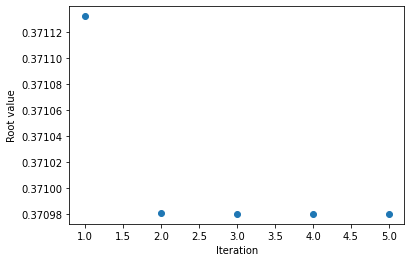

In [461]:
print(epsIter)
x=np.arange(1,6)
plt.plot(x,epsIter,'o')
plt.xlabel('Iteration')
plt.ylabel('Root value')

plt.show()

In [450]:
u,v=LA.eig(finalwater)
print(np.sort(u)[0:10])

[0.37098005 0.43294249 0.46643802 0.53947209 0.5917756  0.70385187
 0.86811614 0.91322348 0.95268039 0.95798485]


In [447]:
runPartitioningAlgo(finalCisHeH,11)

(11, 1) (11, 10)
[0.82869238 1.20240609 1.63686245 1.78808803 1.78808803 2.12464069
 2.36104099 2.36104099 3.01429477 3.21425966 6.83213172]
lowest element index: [ 0  1  2  3  4  5  6  7  8  9 10]
actual lowest element of Hbar: 0.82869237914413
p [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
V 
 [[ 0.          0.05548539  0.00941295  0.          0.          0.01003462
   0.          0.          0.01026425  0.00458917  0.04923198]
 [ 0.05548539  0.         -0.04056526  0.          0.         -0.03362568
   0.          0.         -0.04236168 -0.02231307  0.00093166]
 [ 0.00941295 -0.04056526  0.          0.          0.         -0.00291054
   0.          0.          0.00795478  0.01804292  0.00229463]
 [ 0.          0.          0.          0.          0.          0.
  -0.00238849  0.03786083  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.03786083 -0.00238849  0.          0.          0.        ]
 [ 0.0100346

In [402]:
print(0.8262089374573957-0.81964986,1.0377537482795087-1.03791606)

0.006559077457395701 -0.0001623117204911928


In [ ]:
0.81964986